In [13]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

import os
import random
import glob

In [9]:
TRAIN_IMAGE_DIR = "../data/train/"
images = glob.glob(TRAIN_IMAGE_DIR+"/*.jpg")
print(f"Found files: {len(images)}")

Found files: 12601


In [10]:
train_df = pd.read_csv("../data/Training_set.csv")
train_df

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


<AxesSubplot:xlabel='label', ylabel='count'>

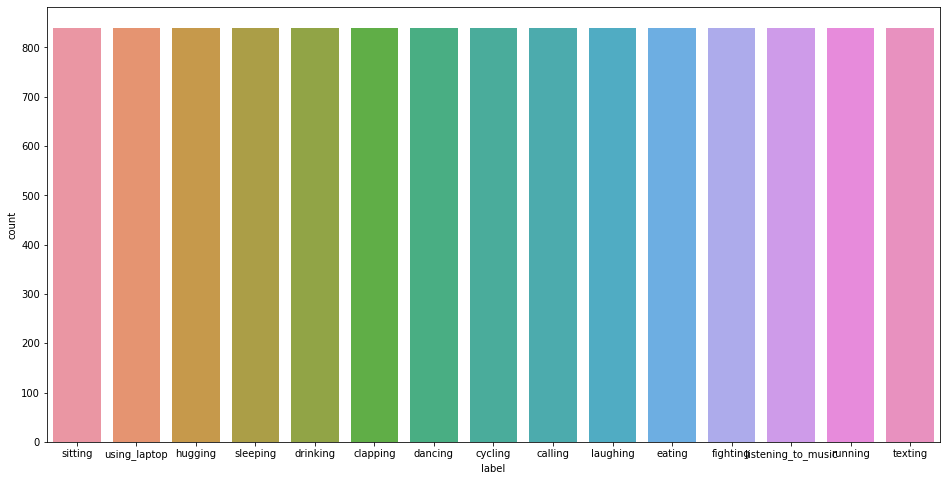

In [11]:
plt.figure(figsize=(16, 8))
sns.countplot(x='label', data=train_df)

In [35]:
def plot_image_examples(df, rows=3, cols=3, title='Image examples'):
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_name = df.iloc[idx].filename
            label = df.iloc[idx].label
            
            img = Image.open(TRAIN_IMAGE_DIR + img_name)
            axs[row, col].imshow(img)
            axs[row, col].set_title(label)
            
            axs[row, col].axis('off')
            
    plt.suptitle(title)

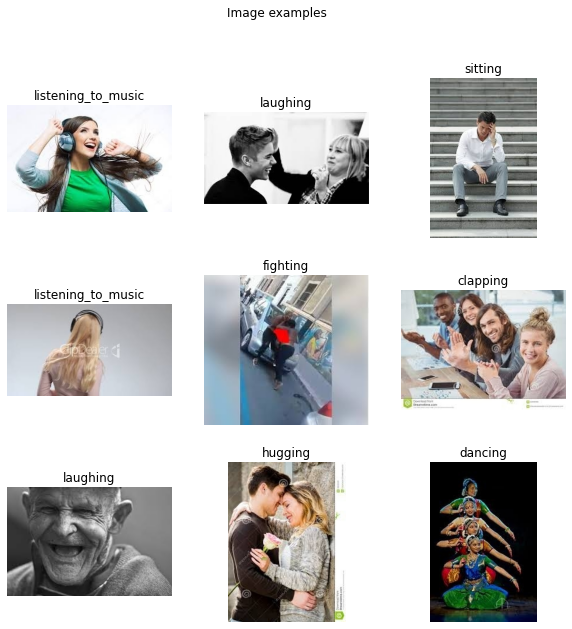

In [38]:
plot_image_examples(train_df)

In [29]:
widths = []
heights = []

for img_file in images:
    img = cv2.imread(img_file, 1)
    h, w = img.shape[:-1]
    widths.append(10*(w//10))
    heights.append(10*(h//10))

/home/zhuldyzzhan/envs/pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

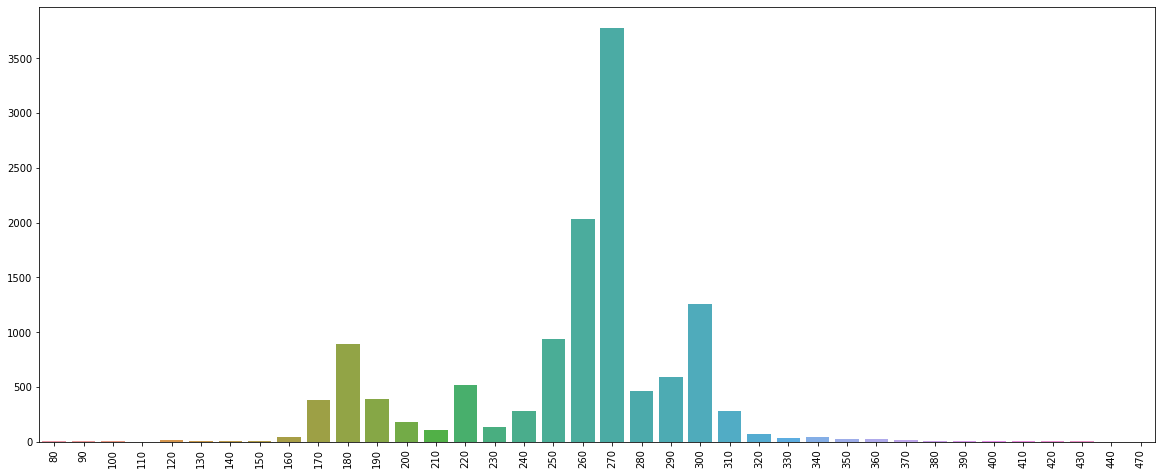

In [31]:
width_uniqs, width_counts = np.unique(widths, return_counts=True)
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.barplot(width_uniqs, width_counts)


/home/zhuldyzzhan/envs/pytorch/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

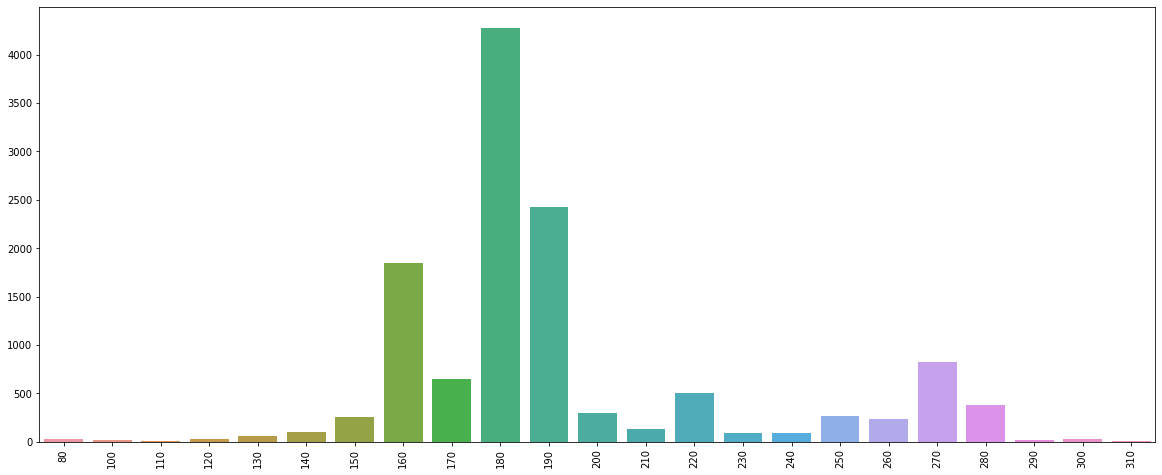

In [32]:
height_uniqs, height_counts = np.unique(heights, return_counts=True)
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.barplot(height_uniqs, height_counts)

We can see that Height of the images is distributed with a mean of around 170-180. Whereas mean Width is about 250-260